<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Question-1-[25-pts]" data-toc-modified-id="Question-1-[25-pts]-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Question 1 [25 pts]</a></span><ul class="toc-item"><li><span><a href="#Standardizing-the-data" data-toc-modified-id="Standardizing-the-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Standardizing the data</a></span></li><li><span><a href="#K-means-algorithm" data-toc-modified-id="K-means-algorithm-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>K-means algorithm</a></span><ul class="toc-item"><li><span><a href="#E-Step" data-toc-modified-id="E-Step-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>E-Step</a></span></li><li><span><a href="#M-Step" data-toc-modified-id="M-Step-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>M-Step</a></span></li></ul></li><li><span><a href="#Test-cases" data-toc-modified-id="Test-cases-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Test cases</a></span><ul class="toc-item"><li><span><a href="#(c)" data-toc-modified-id="(c)-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>(c)</a></span></li><li><span><a href="#(d)" data-toc-modified-id="(d)-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>(d)</a></span></li></ul></li><li><span><a href="#Answers" data-toc-modified-id="Answers-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Answers</a></span><ul class="toc-item"><li><span><a href="#(e)" data-toc-modified-id="(e)-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>(e)</a></span></li><li><span><a href="#(f)" data-toc-modified-id="(f)-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>(f)</a></span></li></ul></li></ul></li></ul></div>

# PS4 
Kazim Sanlav  
2018-12-10 23:38:55 

## Question 1 [25 pts]

Download ps4q1.mat from Moodle. Standardize the data such that it becomes zero mean and unit
variance.  
(a) [1 pt] Plot the standardized data.  
(b) [2 pts] Write down the code for the K-means clustering algorithm (for general K) for l2 norm
(squared Euclidian distance as loss) l1 norm (absolute distance as loss).  
(c) [7 pts] Run the K-means algorithm for K = 2 until convergence for both l2 and l1 norm versions.
Assume that the initial prototype vectors are μ1 = (−1, 1) and μ2 = (1, −1). Plot the resulting
clusters at the end of each maximization step for all steps until convergence. (The figure for K-means
must look like the figure for the K-means example that we did in class. The clusters must be shown
in a two dimensional plot).  
(d) [7 pts] Run the K-means algorithm for K = 3 until convergence for both l2 and l1 norm versions.
Assume that the initial prototype vectors are μ1 = (−1, 1), μ2 = (1, −1) and μ3 = (0, −1). Plot
the resulting clusters at the end of each maximization step for all steps until convergence. (The figure
for K-means must look like the figure for the K-means example that we did in class. The clusters
must be shown in a two dimensional plot).  
(e) [4 pts] Comment on the differences between the clusters formed using l2 and l1 norm versions.
Which one you think is more suitable for this dataset?  
(f) [4 pts] Comment on the differences between the clusters formed using K = 2 and K = 3. Which
one you think is more suitable for this dataset?  


In [14]:
# %% imports

import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import copy

In [15]:
data = sio.loadmat('ps4q1.mat')['data']

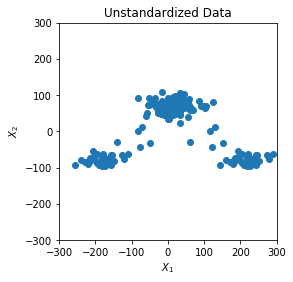

In [16]:
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.axis('scaled')
plt.xlim(-300, 300)
plt.ylim(-300, 300)
plt.title('Unstandardized Data')
plt.show()


### Standardizing the data

In [17]:
mean_x = np.mean(data, axis=0)
std_x = np.std(data, axis=0)

data = (data-mean_x)/std_x

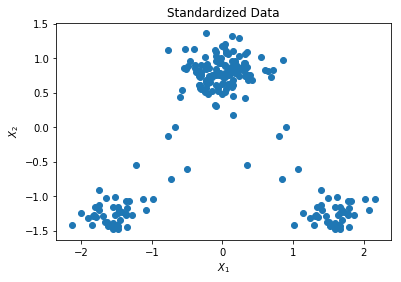

In [18]:
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('Standardized Data')
plt.show()

### K-means algorithm

#### E-Step

**Problem**

\begin{equation}\label{eq:E-step}
minimize \: J = \sum_{i=1}^n \sum_{k=1} ^K r_{ik}||x_i-\mu_k||^2 \\
wrt. \: r_{ik} , i = 1,...,n, k = 1,...,K
\end{equation}

**Solution**

\begin{equation}\label{eq:E-step_Sol}
\\
r_{ik} =
\begin{cases}
    1, & \text{if } k = argmin_{j \in \{1,...,K\}}||x_i - \mu_j||^2\\
    0,              & \text{otherwise}
\end{cases}
\\
\end{equation}

#### M-Step
**Problem**

\begin{equation}\label{eq:M-step}
minimize \; J = \sum_{i=1}^n \sum_{k=1} ^K r_{ik}||x_i-\mu_k||^2 \\
wrt. \: \{\mu_k\}_{k=1} ^K
\end{equation}

**Solution**

\begin{equation}\label{eq:M-step_Sol}
\mu_k = \frac{\sum_{i=1}^n r_{ik}x_i}{\sum_{i=1}^n r_{ik}}
\end{equation}

In [46]:
class Kmeans:
    def __init__(self, data, k=2, norm='l2', pro_vec = None):
        self.data = data
        self.k = k
        self.prototype_vectors = {} if pro_vec is None else pro_vec # μ_k 
        self.r = np.zeros((self.data.shape[0], self.k))
        self.r[::,0]=1  # r_ik
        self.norm = norm  # l1 or l2
        

    def init_clusters(self):
        indexes = np.random.permutation(np.arange(self.data.shape[0]))[:self.k]
        for i in range(self.k):
            # randomly select some instances as μ_k
            self.prototype_vectors[i] = self.data[indexes[i], :]

    def e_step(self):
        '''
        Assign instances to clossest prototype vector 
        '''
        self.r = np.zeros((self.data.shape[0], self.k))  # reset r_ik
        for i in range(self.data.shape[0]):
            cl_clstr = self.closest_cluster(self.data[i, :])
            self.r[i, cl_clstr] = 1  # assign to closest cluster

    def m_step(self):
        '''
        Assign prototype vectors to mean of clusters
        '''
        for i in self.prototype_vectors.keys():
            # clusters centers are the mean of clusters
            self.prototype_vectors[i] = np.mean(
                self.data[np.where(self.r[:, i] == 1)], axis=0)

    def plot_clusters(self,step=0):
        colors = cm.rainbow(np.linspace(0, 1, 2*self.k+1))
        plt.scatter(self.data[:, 0], self.data[:, 1],
                    c=colors[2*np.where(self.r == 1)[1]], alpha=0.5)
        for ind, vec in zip(self.prototype_vectors.keys(), 
                            self.prototype_vectors.values()):
            plt.scatter(vec[0], vec[1], marker='*', c='black', s=5**3)
            plt.text(vec[0], vec[1], s='cluster-{}'.format(ind),
                     horizontalalignment='center', verticalalignment='bottom')
        plt.axis('scaled')
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xlabel('$X_1$')
        plt.ylabel('$X_2$')
        plt.title('Kmeans Clustering-Step{}'.format(step))
        plt.show()

    def iterate(self):
        self.r_ = None
        iteration = 0
        self.plot_clusters(step=iteration)
        if self.prototype_vectors == {}: self.init_clusters();

        while True:
            iteration += 1
            self.r_ = copy.deepcopy(self.r)
            self.e_step()
            self.m_step()
            self.plot_clusters(step=iteration)
#             print('Iteration: ', iteration)
#             print('-'*45)
            if sum(np.concatenate(np.abs(self.r - self.r_))) == 0: break;
      

    def get_dist(self, x, y):
        return np.sqrt(np.dot(x-y, x-y)) if self.norm == 'l2' else np.sum(np.abs(x-y))

    def closest_cluster(self, x) -> int:
        norms = [self.get_dist(x, y) for y in self.prototype_vectors.values()]
        return norms.index(min(norms))

### Test cases

#### (c)

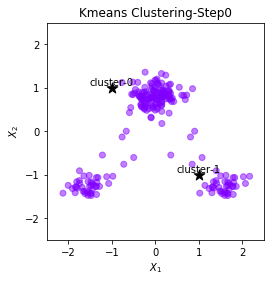

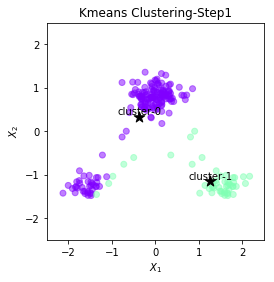

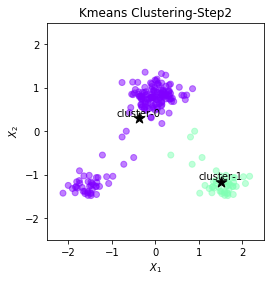

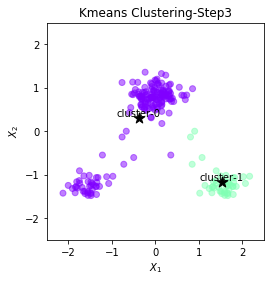

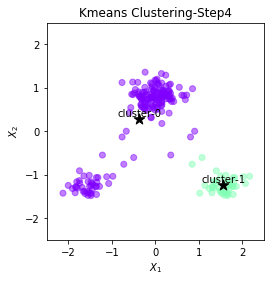

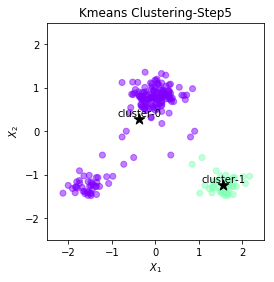

In [47]:
#μ1 = (−1, 1) and μ2 = (1, −1), l2 norm
kmeans = Kmeans(data=data, k=2, norm='l2', 
pro_vec={
    0:np.array([-1, 1]),
    1:np.array([1, -1])})
kmeans.iterate()

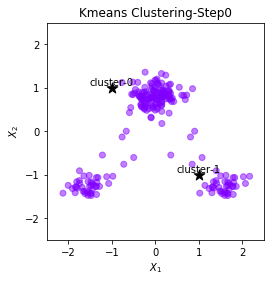

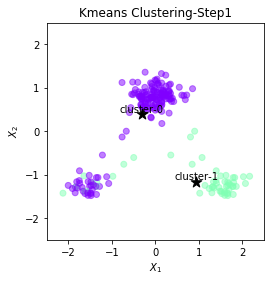

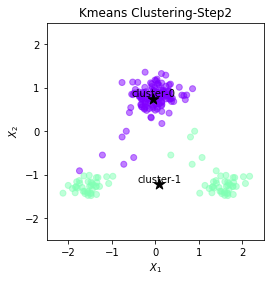

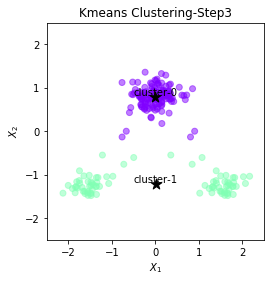

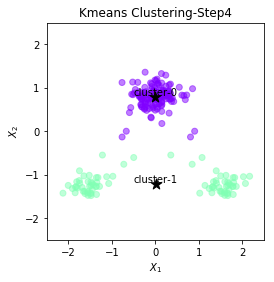

In [48]:
#μ1 = (−1, 1) and μ2 = (1, −1), l1 norm
kmeans = Kmeans(data=data, k=2, norm='l1',
pro_vec={
    0:np.array([-1, 1]),
    1:np.array([1, -1])})
kmeans.iterate()

#### (d)

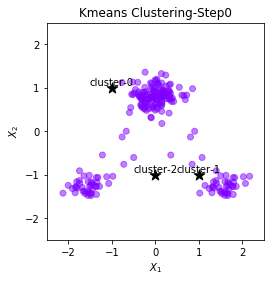

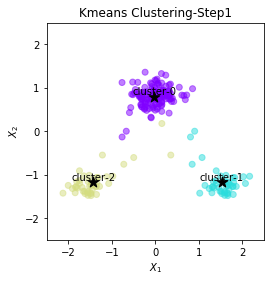

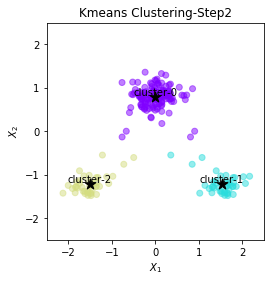

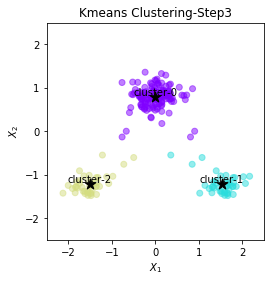

In [49]:
#μ1 = (−1, 1), μ2 = (1, −1) and μ3 = (0, −1), l2 norm 
kmeans = Kmeans(data=data, k=3, norm='l2',
pro_vec={
    0:np.array([-1, 1]),
    1:np.array([1, -1]),
    2:np.array([0, -1])})
kmeans.iterate()

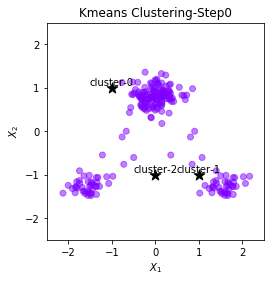

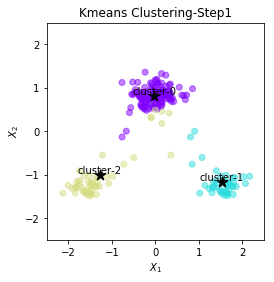

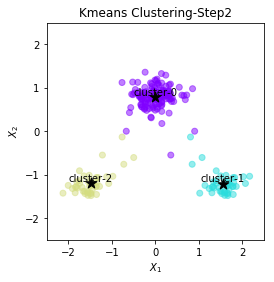

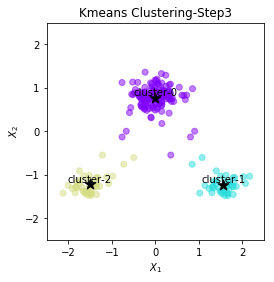

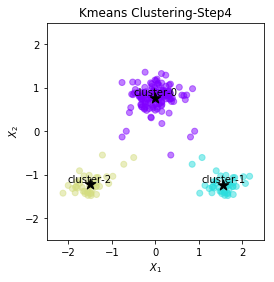

In [50]:
#μ1 = (−1, 1), μ2 = (1, −1) and μ3 = (0, −1), l1 norm 
kmeans = Kmeans(data=data, k=3, norm='l1',
pro_vec={
    0:np.array([-1, 1]),
    1:np.array([1, -1]),
    2:np.array([0, -1])})
kmeans.iterate()

### Answers

#### (e)

In k=2 case, both $l_1$ and $l_2$ formed thier clusters by seperating a pile from remaining two, but prototype vectors are (*cluster centers*) end up being in different locations due to the effect of using different norms in their \textit{E-step}.  
If a need to pick one, I would choose the $l_1$ for k=2 cases, because one of its prototype vector is just in the middle of the most crowded pile and the other is between the remaining piles. Compared to $l_2$, their prototype vectors are in better position for k=2 cases. 

---

In k=3 case, both found the almost same clusters, there is only 1 point which is in cluster-0 $l_1$ and  in cluster-1 for $l_2$ case. So, for k=2 both are doing fine and same.


#### (f)

Clearly k=3 case is a better choice for this dataset. By looking to 2D plot, we can observe that there are actually 3 pile in the original data as $x_i \in R^2 \; \text{for } i =1,...,K$ but we can also get the result that k=3 is a better choice by simply running the algorithm with random initial prototype vectors several times and comparing the final cluster centers. For k=2 case, algorithm will end up putting any of the 2 piles in one cluster and the remaining one to the other cluster, so there is no robost results (*we will observe 3 cases*) but in k=3 case, algorithm will converge to the same clusters (*permutations*) almost everytime by random initializations. 